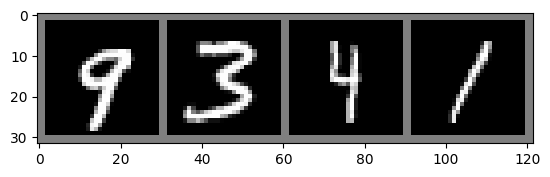

In [35]:
# (a)
import torchvision
import numpy as np
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_subset, _ = torch.utils.data.random_split(trainset, [10000, len(trainset) - 10000])
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=4, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)  
imshow(torchvision.utils.make_grid(images))

In [36]:
# (b)
def flatten_and_rescale(images):
    images = images.view(images.size(0), -1)  
    images = images / 1.0  
    return images

flattened_images = flatten_and_rescale(images)

print("Shape of flattened images:", flattened_images.shape)  
print("First flattened image:", flattened_images[0])

Shape of flattened images: torch.Size([4, 784])
First flattened image: tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.00

In [37]:
# (c)
input_size = 784  
hidden_size = 128  
output_size = 10   

W1 = torch.zeros(input_size, hidden_size, requires_grad=True)  
b1 = torch.zeros(hidden_size, requires_grad=True)             

W2 = torch.zeros(hidden_size, output_size, requires_grad=True) 
b2 = torch.zeros(output_size, requires_grad=True)               

print("Shape of W1:", W1.shape)  
print("Shape of b1:", b1.shape)  
print("Shape of W2:", W2.shape)  
print("Shape of b2:", b2.shape)  

Shape of W1: torch.Size([784, 128])
Shape of b1: torch.Size([128])
Shape of W2: torch.Size([128, 10])
Shape of b2: torch.Size([10])


In [38]:
# (d)
def forward_pass(X):
    h1 = F.relu(X.mm(W1) + b1)  
    Y = h1.mm(W2) + b2
    return Y

output = forward_pass(flattened_images)
print("Shape of the output:", output.shape)  
print("Predicted output for the first image:", output[0])

Shape of the output: torch.Size([4, 10])
Predicted output for the first image: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SelectBackward0>)


In [39]:
# (e)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD([W1, b1, W2, b2], lr=0.001)

num_steps = 1000
log_interval = 100  

for step in range(num_steps):
    images, labels = next(dataiter)
    flattened_images = flatten_and_rescale(images)  
    outputs = forward_pass(flattened_images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (step + 1) % log_interval == 0:
        print(f"Step [{step+1}/{num_steps}], Loss: {loss.item():.4f}")

Step [100/1000], Loss: 2.3024
Step [200/1000], Loss: 2.3027
Step [300/1000], Loss: 2.3030
Step [400/1000], Loss: 2.3010
Step [500/1000], Loss: 2.3045
Step [600/1000], Loss: 2.3039
Step [700/1000], Loss: 2.3067
Step [800/1000], Loss: 2.3038
Step [900/1000], Loss: 2.2992
Step [1000/1000], Loss: 2.3027


Step [100/1000], Loss: 2.3021
Step [200/1000], Loss: 2.3015
Step [300/1000], Loss: 2.2981
Step [400/1000], Loss: 2.3054
Step [500/1000], Loss: 2.3100
Step [600/1000], Loss: 2.3078
Step [700/1000], Loss: 2.2929
Step [800/1000], Loss: 2.3069
Step [900/1000], Loss: 2.3113
Step [1000/1000], Loss: 2.3090


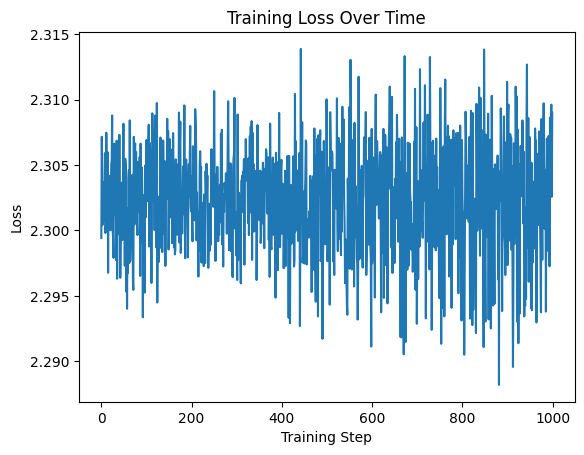

In [40]:
# (f)
training_losses = []

for step in range(num_steps):
    images, labels = next(dataiter)
    flattened_images = flatten_and_rescale(images)  
    outputs = forward_pass(flattened_images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    if (step + 1) % log_interval == 0:
        print(f"Step [{step+1}/{num_steps}], Loss: {loss.item():.4f}")

plt.plot(training_losses)
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

In [41]:
# (g)
for step in range(num_steps):
    try:
        images, labels = next(dataiter)
    except StopIteration:
        dataiter = iter(trainloader)
        images, labels = next(dataiter)
    
    flattened_images = flatten_and_rescale(images)  
    h1_adam = F.relu(flattened_images.mm(W1_adam) + b1_adam)  
    outputs_adam = h1_adam.mm(W2_adam) + b2_adam  
    loss_adam = criterion(outputs_adam, labels)
    optimizer_adam.zero_grad()
    loss_adam.backward()
    optimizer_adam.step()
    training_losses_adam.append(loss_adam.item())

    if (step + 1) % log_interval == 0:
        print(f"Adam - Step [{step+1}/{num_steps}], Loss: {loss_adam.item():.4f}")

Adam - Step [100/1000], Loss: 2.2605
Adam - Step [200/1000], Loss: 2.2472
Adam - Step [300/1000], Loss: 2.3045
Adam - Step [400/1000], Loss: 2.3258
Adam - Step [500/1000], Loss: 2.2941
Adam - Step [600/1000], Loss: 2.3195
Adam - Step [700/1000], Loss: 2.3321
Adam - Step [800/1000], Loss: 2.2950
Adam - Step [900/1000], Loss: 2.3764
Adam - Step [1000/1000], Loss: 2.2440


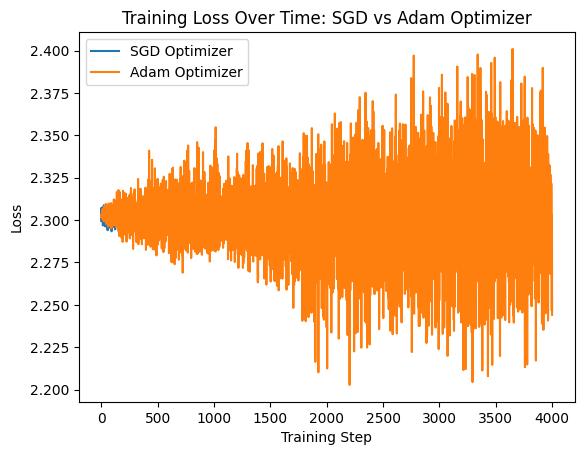

In [42]:
# (h)
plt.plot(training_losses, label='SGD Optimizer')           
plt.plot(training_losses_adam, label='Adam Optimizer')     

plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Over Time: SGD vs Adam Optimizer")
plt.legend()  

plt.show()

In [43]:
# (i)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)


def evaluate_accuracy(W1, b1, W2, b2):
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            flattened_images = flatten_and_rescale(images)  
            h1 = F.relu(flattened_images.mm(W1) + b1) 
            outputs = h1.mm(W2) + b2  
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

accuracy_sgd = evaluate_accuracy(W1, b1, W2, b2)
print(f'Accuracy of the network trained with SGD: {accuracy_sgd:.2f}%')

accuracy_adam = evaluate_accuracy(W1_adam, b1_adam, W2_adam, b2_adam)
print(f'Accuracy of the network trained with Adam: {accuracy_adam:.2f}%')

Accuracy of the network trained with SGD: 11.35%
Accuracy of the network trained with Adam: 10.28%
